In [2]:
import os,sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import sqlite3
import pandas as pd

# Set custom color cycle
custom_colors = [    
    '#0081C8',  # Olynmpic Blue
    '#FCB131', # Olympic Yellow
    '#000000', # Olympic Black
    '#00A651',  # Olympic Green
    '#EE334E',  # Olynmpic Red
    '#F47835',  # Olympic Orange
    '#7C878E',  # Olympic Grey
    '#C8102E',  # Olympic Red
    '#EF3340',  # Olympic Red
    '#FFD662',  # Olympic Yellow
    '#00539C',  # Olympic Blue
]

mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=custom_colors)


In [3]:
pd.set_option('display.max_columns', None)

file_path = "/groups/icecube/simon/GNN/workspace/data/Converted_I3_file/upgrade_genie_level4_queso_141029_000002.db"

con = sqlite3.connect(file_path)

cur = con.cursor()

table_list = [a for a in cur.execute("SELECT name FROM sqlite_master WHERE type='table'")]

print(table_list)

# Load data from CSV
df_truth = pd.read_sql_query("SELECT * FROM truth", con)
df_splits = pd.read_sql_query("SELECT * FROM SplitInIcePulsesSRT", con)
df_primary = pd.read_sql_query("SELECT * FROM primary_particle", con)
df_secondary = pd.read_sql_query("SELECT * FROM secondary_particle", con)
#df_tertiary = pd.read_sql_query("SELECT * FROM tertiary_particle", con)
#df = pd.read_sql_query("SELECT * FROM truth, SplitInIcePulsesSRT", con)
df_truth.head()


[('truth',), ('SplitInIcePulsesSRT',), ('primary_particle',), ('secondary_particle',)]


,energy,position_x,position_y,position_z,azimuth,zenith,pid,event_time,sim_type,interaction_type,elasticity,RunID,SubrunID,EventID,SubEventID,dbang_decay_length,track_length,stopped_muon,energy_track,energy_cascade,inelasticity,DeepCoreFilter_13,CascadeFilter_13,MuonFilter_13,OnlineL2Filter_17,L3_oscNext_bool,L4_oscNext_bool,L5_oscNext_bool,L6_oscNext_bool,L7_oscNext_bool,event_no
0,11.272304,-58.677740,10.609610,-556.729376,2.829364,1.782747,-14.0,1.306125e+17,NuGen,1.0,-1.0,141029.0,2.0,6.0,0.0,-1.0,-1.0,-1.0,11.114523,0.157781,0.013997,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0
1,27.784960,111.767959,-136.164911,-399.364920,5.083856,1.252719,-14.0,1.306125e+17,NuGen,1.0,-1.0,141029.0,2.0,7.0,0.0,-1.0,-1.0,-1.0,25.995633,1.789327,0.064399,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1
2,22.318636,155.587986,146.828644,-486.401479,1.162780,1.500390,-14.0,1.306125e+17,NuGen,1.0,-1.0,141029.0,2.0,27.0,0.0,-1.0,-1.0,-1.0,20.306107,2.012529,0.090173,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2
3,31.842394,108.516965,-132.898487,-155.579176,5.600002,1.674012,-14.0,1.306125e+17,NuGen,1.0,-1.0,141029.0,2.0,28.0,0.0,-1.0,-1.0,-1.0,14.706431,17.135964,0.538149,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,3
4,1.048563,30.549675,-58.516894,-458.121591,0.081193,0.198916,-14.0,1.306125e+17,NuGen,1.0,-1.0,141029.0,2.0,38.0,1.0,-1.0,-1.0,-1.0,0.668298,0.380265,0.362654,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,4


In [4]:
df_secondary.head()

,X_position_MuMinus,Y_position_MuMinus,Z_position_MuMinus,Azimuth_MuMinus,Zenith_MuMinus,Energy_MuMinus,Length_MuMinus,Time_MuMinus,X_position_MuPlus,Y_position_MuPlus,Z_position_MuPlus,Azimuth_MuPlus,Zenith_MuPlus,Energy_MuPlus,Length_MuPlus,Time_MuPlus,EventID
0,None,None,None,None,None,None,None,None,-58.677740,10.609610,-556.729376,2.836819,1.811611,11.008865,51.255717,9174.855620,6.0
1,None,None,None,None,None,None,None,None,111.767959,-136.164911,-399.364920,5.116218,1.239146,25.889975,116.268461,9691.634461,7.0
2,None,None,None,None,None,None,None,None,155.587986,146.828644,-486.401479,1.141473,1.453577,20.200449,87.156510,9339.249617,27.0
3,None,None,None,None,None,None,None,None,108.516965,-132.898487,-155.579176,5.488467,1.632836,14.600772,63.692719,10567.049284,28.0
4,None,None,None,None,None,None,None,None,30.549675,-58.516894,-458.121591,1.072174,0.217911,0.562640,2.246492,23991.807821,38.0


In [5]:
# Write a function which calculates the track using the truth information, i.e. position_x, position_y, position_z, azimuth, zenith and track_length. If track_length is -1 set the track to be a 100000.

def track(df):
    if df['track_length'] == -1.0:
        df['track_length'] = 100000
    x_end = df['position_x'] + df['track_length']*np.sin(df['zenith'])*np.cos(df['azimuth'])
    y_end = df['position_y'] + df['track_length']*np.sin(df['zenith'])*np.sin(df['azimuth'])
    z_end = df['position_z'] + df['track_length']*np.cos(df['zenith'])
    return x_end, y_end, z_end

df_truth['x_end'], df_truth['y_end'], df_truth['z_end'] = zip(*df_truth.apply(track, axis=1))


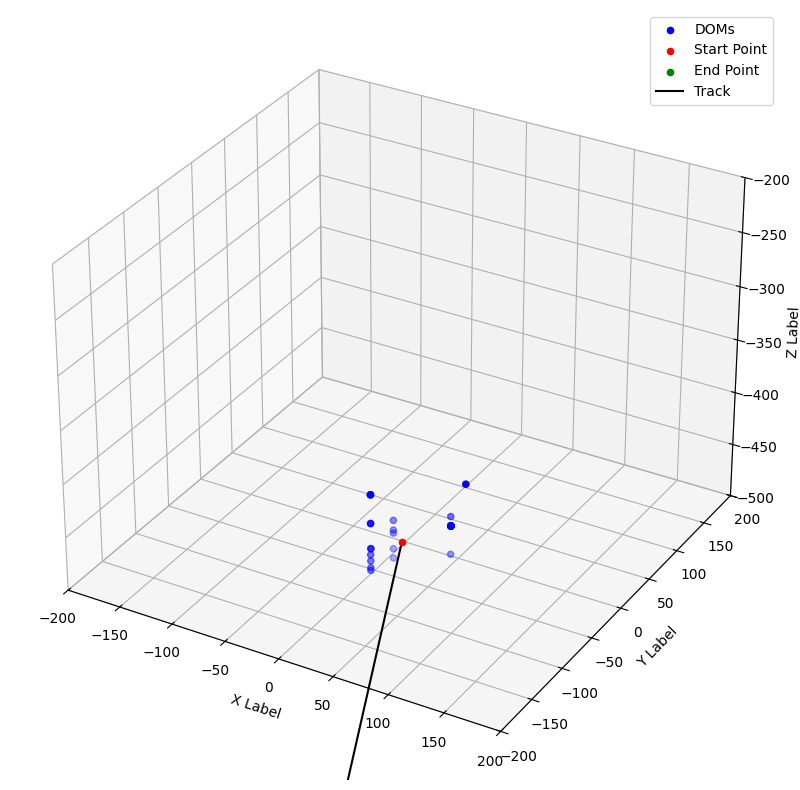

In [6]:
# Sort the df_splits and df_truth table by event_no
df_splits = df_splits.sort_values(by=['event_no'])
df_truth = df_truth.sort_values(by=['event_no'])

# Plot the start point, end point and the track for the first event. Also plot the DOMs in the first event.

event_no = 4
df_splits_event = df_splits[df_splits['event_no'] == event_no]
df_truth_event = df_truth[df_truth['event_no'] == event_no]

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
# Make the plot interactive

ax.scatter(df_splits_event['dom_x'], df_splits_event['dom_y'], df_splits_event['dom_z'], c='b', marker='o', label='DOMs')
ax.scatter(df_truth_event['position_x'], df_truth_event['position_y'], df_truth_event['position_z'], c='r', marker='o', label='Start Point')
ax.scatter(df_truth_event['x_end'], df_truth_event['y_end'], df_truth_event['z_end'], c='g', marker='o', label='End Point')

ax.plot([df_truth_event['position_x'].values[0], df_truth_event['x_end'].values[0]], [df_truth_event['position_y'].values[0], df_truth_event['y_end'].values[0]], [df_truth_event['position_z'].values[0], df_truth_event['z_end'].values[0]], c='k', label='Track')


ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_xlim([-200, 200])
ax.set_ylim([-200, 200])
ax.set_zlim([-500, -200])

plt.legend()



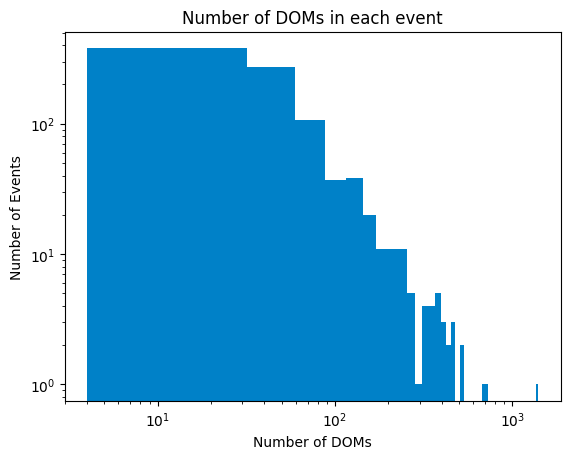

In [7]:
# Make a plot of the number of DOMs in each event.

df_splits['event_no'].value_counts().plot(kind='hist', bins=50, logy=True, logx=True)	
plt.xlabel('Number of DOMs')
plt.ylabel('Number of Events')
plt.title('Number of DOMs in each event')
plt.show()


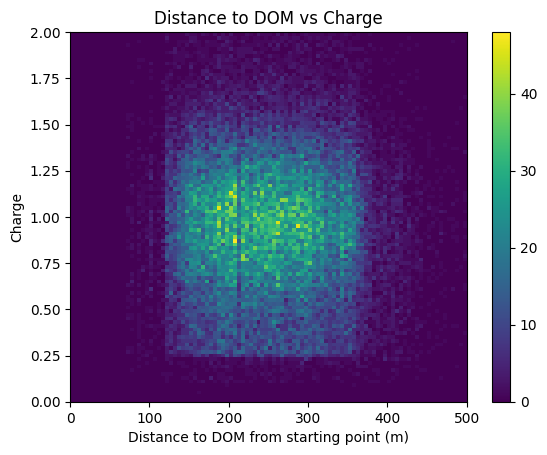

In [8]:
# Make a heat map with distance to Dom vs charge as a 2d histogram for 
# all events. Use the plt.hist2d function.
dom_pos = df_splits[['dom_x', 'dom_y', 'dom_z']].values
charge = df_splits['charge'].values
distance = np.sqrt(np.sum((dom_pos - df_truth[['position_x', 'position_y', 'position_z']].values[0])**2, axis=1))

plt.hist2d(distance, charge, bins=100, cmap='viridis', range = [[0, 500], [0, 2]])

plt.colorbar()
plt.xlabel('Distance to DOM from starting point (m)')
plt.ylabel('Charge')

plt.title('Distance to DOM vs Charge')
plt.show()



In [9]:
def calculate_path(df):
    x = df['position_x']
    y = df['position_y']
    z = df['position_z']
    zenith = df['zenith']
    azimuth = df['azimuth']
    track_length = df['track_length']
    
    x_end = x + track_length * np.sin(zenith) * np.cos(azimuth)
    y_end = y + track_length * np.sin(zenith) * np.sin(azimuth)
    z_end = z + track_length * np.cos(zenith)
    
    return x, y, z, x_end, y_end, z_end

df_truth['x'], df_truth['y'], df_truth['z'], df_truth['x_end'], df_truth['y_end'], df_truth['z_end'] = zip(*df_truth.apply(calculate_path, axis=1))

# Merge df_truth with df_splits on a common key ('event_no')
df_merged = pd.merge(df_splits, df_truth[['event_no', 'x', 'y', 'z', 'x_end', 'y_end', 'z_end']], on='event_no')

# Vectorized function to calculate distance of DOM from the particle path
def calculate_distance_to_path_vectorized(df):
    # Coordinates of DOMs
    x_dom = df['dom_x'].values
    y_dom = df['dom_y'].values
    z_dom = df['dom_z'].values
    
    # Coordinates of the particle path start and end
    x_start = df['x'].values
    y_start = df['y'].values
    z_start = df['z'].values
    x_end = df['x_end'].values
    y_end = df['y_end'].values
    z_end = df['z_end'].values
    
    # Vectors along the path and to the DOM
    path_vec = np.vstack([x_end - x_start, y_end - y_start, z_end - z_start]).T
    dom_vec = np.vstack([x_dom - x_start, y_dom - y_start, z_dom - z_start]).T
    
    # Length and unit vector along the path
    path_len = np.linalg.norm(path_vec, axis=1)  # Length of the path
    path_unit_vec = path_vec / path_len[:, np.newaxis]  # Unit vector along the path
    
    # Scalar projection to find the nearest point on the path to the DOM
    t = np.einsum('ij,ij->i', dom_vec, path_unit_vec) / path_len
    t = np.clip(t, 0, 1)  # Ensure t is between 0 and 1
    
    # Nearest points on the path
    nearest_points = path_vec * t[:, np.newaxis]
    
    # Distance vector between DOM and nearest points on the path
    distance_vec = dom_vec - nearest_points
    distance_to_path = np.linalg.norm(distance_vec, axis=1)
    
    return distance_to_path

# Apply the vectorized distance calculation
df_merged['distance_to_path'] = calculate_distance_to_path(df_merged)

# 2D Histogram of distance to path vs charge
plt.hist2d(df_merged['distance_to_path'], df_merged['charge'], bins=100, cmap='viridis', range=[[0, 500], [0, 2]])
plt.colorbar()
plt.xlabel('Distance to path from DOM (m)')
plt.ylabel('Charge')
plt.title('Distance to path vs Charge')
plt.show()
print(df_merged['distance_to_path'].describe)

NameError: name 'calculate_distance_to_path' is not defined

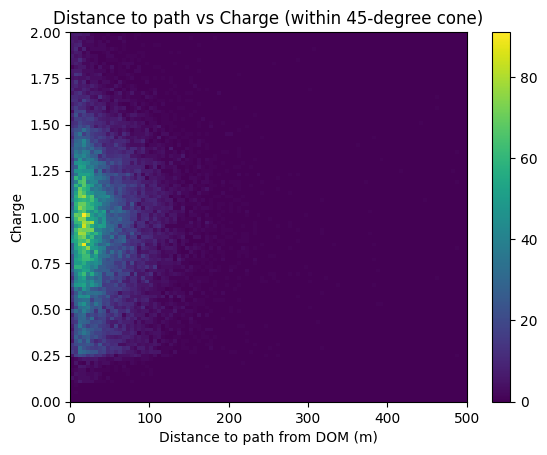

In [32]:

# Function to calculate the start and end coordinates of the particle's path based on zenith and azimuth
def calculate_path_with_cone(df):
    x = df['position_x']
    y = df['position_y']
    z = df['position_z']
    zenith = df['zenith'] + np.pi  # Adding pi to zenith as per the updated version
    azimuth = df['azimuth']
    track_length = 300  # Fixed track length
    
    # Calculate the end coordinates of the track
    x_end = x + track_length * np.sin(zenith) * np.cos(azimuth)
    y_end = y + track_length * np.sin(zenith) * np.sin(azimuth)
    z_end = z + track_length * np.cos(zenith)
    
    return x, y, z, x_end, y_end, z_end

# Apply the path calculation to df_truth
df_truth['x'], df_truth['y'], df_truth['z'], df_truth['x_end'], df_truth['y_end'], df_truth['z_end'] = zip(*df_truth.apply(calculate_path_with_cone, axis=1))

# Merge df_truth with df_splits on 'event_no'
df_merged = pd.merge(df_splits, df_truth[['event_no', 'x', 'y', 'z', 'x_end', 'y_end', 'z_end']], on='event_no')

# Vectorized function to calculate the distance of DOMs from the particle path and apply the 45-degree cone check
def calculate_distance_to_path_with_cone(df):
    # DOM positions
    x_dom = df['dom_x'].values
    y_dom = df['dom_y'].values
    z_dom = df['dom_z'].values
    
    # Path start and end coordinates
    x_start = df['x'].values
    y_start = df['y'].values
    z_start = df['z'].values
    x_end = df['x_end'].values
    y_end = df['y_end'].values
    z_end = df['z_end'].values
    
    # Vectors along the path and to the DOM
    path_vec = np.vstack([x_end - x_start, y_end - y_start, z_end - z_start]).T
    dom_vec = np.vstack([x_dom - x_start, y_dom - y_start, z_dom - z_start]).T
    
    path_len = np.linalg.norm(path_vec, axis=1)  # Length of the path
    path_unit_vec = path_vec / path_len[:, np.newaxis]  # Unit vector along the path
    
    # Scalar projection to find the nearest point on the path to the DOM
    t = np.einsum('ij,ij->i', dom_vec, path_unit_vec) / path_len
    t = np.clip(t, 0, 1)  # Clip t to ensure it lies within the segment [0, 1]
    
    # Nearest points on the path
    nearest_points = path_vec * t[:, np.newaxis]
    
    # Distance vector between DOM and nearest points on the path
    distance_vec = dom_vec - nearest_points
    distance_to_path = np.linalg.norm(distance_vec, axis=1)
    
    # Calculate the angle between the path vector and the vector from the path start to the DOM
    dom_unit_vec = dom_vec / np.linalg.norm(dom_vec, axis=1)[:, np.newaxis]  # Unit vector from path start to DOM
    angles = np.arccos(np.clip(np.einsum('ij,ij->i', path_unit_vec, dom_unit_vec), -1.0, 1.0))  # Angle in radians
    
    # Filter distances by the 45-degree cone (within pi/4 radians)
    distance_to_path_cone = np.where(angles <= np.pi / 4, distance_to_path, np.nan)  # DOMs outside the cone get NaN
    
    return distance_to_path_cone

# Apply the vectorized distance function with cone check
df_merged['distance_to_path_cone'] = calculate_distance_to_path_with_cone(df_merged)

# Plot the result, excluding NaN distances
plt.hist2d(df_merged['distance_to_path_cone'], df_merged['charge'], bins=100, cmap='viridis', range=[[0, 500], [0, 2]])
plt.colorbar()
plt.xlabel('Distance to path from DOM (m)')
plt.ylabel('Charge')
plt.title('Distance to path vs Charge (within 45-degree cone)')
plt.show()


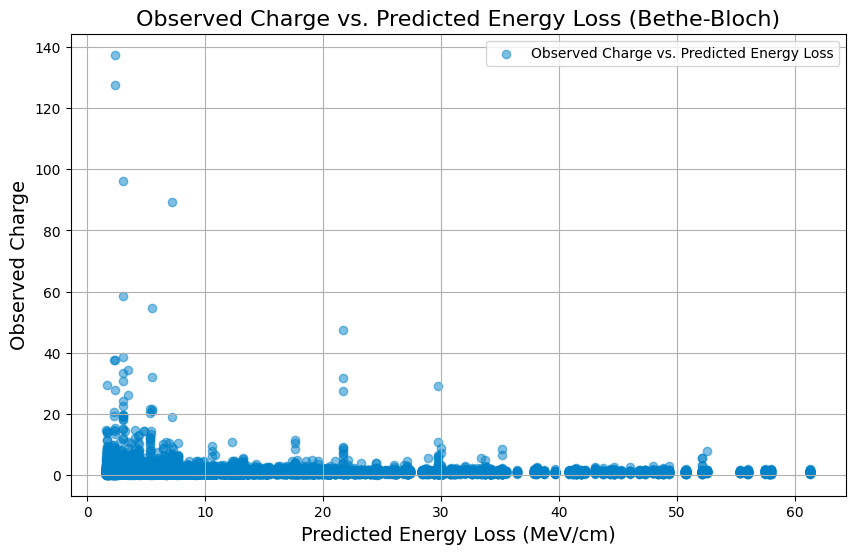

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, log

# Constants
c = 0.299792458  # Speed of light in vacuum (m/ns)
K = 0.307075  # MeV g^-1 cm^2
z = 1  # muon charge
Z = 7.42  # Effective atomic number for ice (H2O)
A = 18.015  # Atomic mass of ice (water) in g/mol
m_mu = 105.66  # MeV/c^2, muon mass
m_e = 0.511  # MeV/c^2, electron mass
rho = 0.917  # g/cm^3, density of ice
I = 0.000078  # MeV (mean excitation potential of ice, 78 eV)


def calculate_total_energy(E_kinetic):
    E_total = E_kinetic + m_mu  # MeV, where m_mu is the rest mass energy
    return E_total


def estimate_initial_momentum(E_total):
    p_initial = np.sqrt(E_total ** 2 - m_mu ** 2)  # MeV/c
    return p_initial


gamma = lambda p: np.sqrt(1 + (p / m_mu) ** 2)
beta = lambda p: np.sqrt(1 - 1 / gamma(p) ** 2)
beta_gamma = lambda p: p / m_mu
T_max = lambda p: 2 * m_e * (beta_gamma(p)) ** 2 / (1 + 2 * gamma(p) * m_e / m_mu + (m_e / m_mu) ** 2)

# Plasma frequency
h_omega_p = np.sqrt(rho * Z / A) * 28.816 / 1e6  # Convert to MeV

# Bethe-Bloch formula for energy loss in ice
def dE_over_dX(p):
    beta_val = beta(p)
    return K * z**2 * (Z / A) / beta_val**2 * (
        0.5 * log(2 * m_e * T_max(p) / h_omega_p**2) - beta_val**2 + 0.5
    )

kinetic_energy = df_truth['energy'].values  

# Step 1: Calculate the total energy
total_energy = calculate_total_energy(kinetic_energy)

# Step 2: Estimate the initial momentum for each event
initial_momentum = estimate_initial_momentum(total_energy)

# Step 3: Calculate the predicted energy loss (dE/dX) using the Bethe-Bloch formula
predicted_energy_loss = np.array([dE_over_dX(p) for p in initial_momentum])

event_ids_merged = df_merged['event_no'].values


expanded_predicted_energy_loss = np.zeros(len(df_merged), dtype=float)

# For each event, assign the corresponding predicted energy loss to all DOMs in that event
for event_no in df_truth['event_no'].unique():
    # Get the energy loss for the current event
    energy_loss_event = predicted_energy_loss[df_truth['event_no'] == event_no]
    
    # Assign this value to all DOM hits in df_merged that correspond to this event
    expanded_predicted_energy_loss[df_merged['event_no'] == event_no] = energy_loss_event

# Step 5: Create a scatter plot of predicted energy loss vs observed charge
plt.figure(figsize=(10, 6))
plt.scatter(expanded_predicted_energy_loss, df_merged['charge'], alpha=0.5, label='Observed Charge vs. Predicted Energy Loss')

plt.xlabel('Predicted Energy Loss (MeV/cm)', fontsize=14)
plt.ylabel('Observed Charge', fontsize=14)
plt.title('Observed Charge vs. Predicted Energy Loss (Bethe-Bloch)', fontsize=16)
plt.grid(True)
plt.legend()
plt.show()


In [62]:
def calculate_distance_relativ_time(df):
    start_time = 0
    relative_time = df['dom_time'] - df.groupby('event_no')['dom_time'].transform('min')
    v_muon = 0.98 * 299792458 * 1e-9  # Speed of light in ice (m/ns)
    return relative_time*v_muon

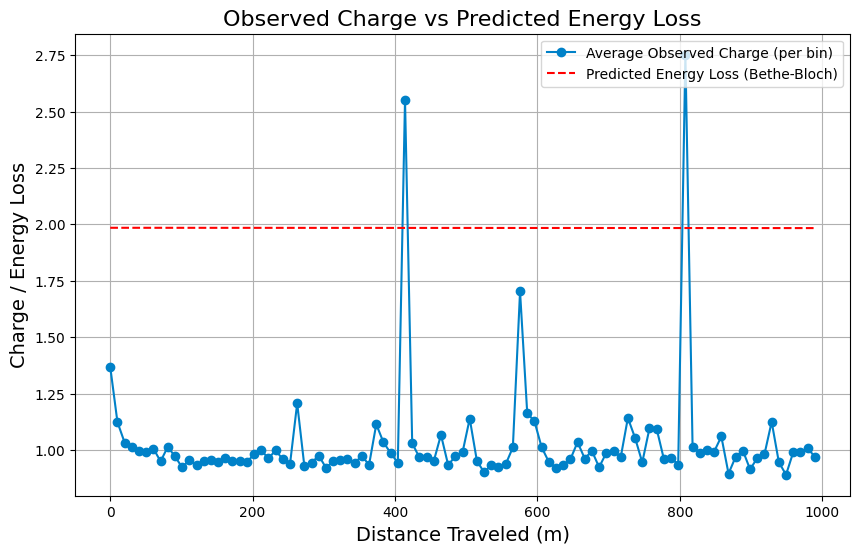

In [107]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, log

# Constants
c = 0.299792458  # Speed of light in vacuum (m/ns)
K = 0.307075  # MeV g^-1 cm^2
z = 1  # muon charge
Z = 7.42  # Effective atomic number for ice (H2O)
A = 18.015  # Atomic mass of ice (water) in g/mol
m_mu = 105.66  # MeV/c^2, muon mass
m_e = 0.511  # MeV/c^2, electron mass
rho = 0.917  # g/cm^3, density of ice
I = 0.000078  # MeV (mean excitation potential of ice, 78 eV)
v_muon = 0.98 * c  # Speed of muon in ice (m/ns)

# Plasma frequency
h_omega_p = np.sqrt(rho * Z / A) * 28.816 / 1e6  # Convert to MeV

# Function to calculate initial momentum from total energy (E_initial includes rest mass energy)
def estimate_initial_momentum(E_initial):
    # Ensure energies are valid (greater than rest mass energy)
    valid_energy_mask = E_initial > m_mu  # Only valid energies are allowed
    p_initial = np.zeros_like(E_initial)  # Initialize momentum with zeros
    
    # Calculate momentum only for valid energies
    valid_energy = E_initial[valid_energy_mask]
    if len(valid_energy) == 0:
        print("Warning: No valid energy values found.")
        return np.zeros_like(E_initial)
    
    # E_initial is in MeV, so momentum is calculated in MeV/c
    p_initial[valid_energy_mask] = np.sqrt((valid_energy / c) ** 2 - m_mu ** 2)  # MeV/c
    p_initial[~valid_energy_mask] = np.nan  # Assign NaN for invalid energies
    return p_initial

# Define functions for beta, gamma, and T_max
gamma = lambda p: np.sqrt(1 + (p / m_mu) ** 2)
beta = lambda p: np.sqrt(1 - 1 / gamma(p) ** 2)
beta_gamma = lambda p: p / m_mu
T_max = lambda p: 2 * m_e * (beta_gamma(p)) ** 2 / (1 + 2 * gamma(p) * m_e / m_mu + (m_e / m_mu) ** 2)

# Bethe-Bloch formula for energy loss in ice
def dE_over_dX(p):
    beta_val = beta(p)
    if np.any(beta_val <= 0) or np.any(np.isnan(beta_val)):  # Element-wise check for invalid beta values
        return np.nan
    return K * z**2 * (Z / A) / beta_val**2 * (
        0.5 * np.log(2 * m_e * T_max(p) / h_omega_p**2) - beta_val**2 + 0.5
    )

# Function to update momentum after energy loss in each bin
MIN_ENERGY_LOSS = 0.1  # MeV/cm, adjust as needed
initial_momentum = estimate_initial_momentum(initial_energy)

# Function to update momentum after energy loss in each bin
def update_momentum(p_initial, dE_dx_bin, bin_width):
    energy_loss = np.maximum(dE_dx_bin * bin_width, MIN_ENERGY_LOSS)  # Energy loss in MeV
    total_energy = np.sqrt(p_initial**2 + m_mu**2)  # Total energy (including rest mass energy)
    new_total_energy = total_energy - energy_loss  # Updated total energy after energy loss

    if np.any(new_total_energy <= m_mu):
        return np.nan  # Stop if the muon can't lose more energy
    
    new_momentum = np.sqrt(new_total_energy**2 - m_mu**2)  # Calculate new momentum
    return new_momentum

# Step 1: Calculate the distance traveled relative to start time for each event
def calculate_distance_relative_time(df):
    relative_time = df['dom_time'] - df.groupby('event_no')['dom_time'].transform('min')
    return relative_time * v_muon  # distance traveled in meters

df_merged['distance_traveled'] = calculate_distance_relative_time(df_merged)

# Apply realistic bounds on the distance (adjust as needed for your setup)
df_merged = df_merged[df_merged['distance_traveled'] <= 1000]

# Define bins for the distance traveled (in meters)
bins = np.linspace(0, df_merged['distance_traveled'].max(), 100)

# Step 2: Calculate the average observed charge in each distance bin
bin_indices = np.digitize(df_merged['distance_traveled'], bins)

average_charge_per_bin = [df_merged.loc[bin_indices == i, 'charge'].mean() for i in range(1, len(bins))]
average_charge_per_bin = [val if not np.isnan(val) else 0 for val in average_charge_per_bin]  # Replace NaNs with 0

# Step 3: Estimate initial momentum for the muons from their total energy (replace with actual energy data)
initial_energy = df_truth['energy'].values * 1000  # Replace with your actual initial energy data
initial_momentum = estimate_initial_momentum(initial_energy)

# Step 4: Calculate predicted energy loss (Bethe-Bloch) for each distance bin, updating momentum iteratively
bin_width = 5  # Smaller bin width (in meters) to limit energy loss per step

predicted_energy_loss = []
current_momentum = initial_momentum.copy()  # Start with the initial momentum

for i in range(len(bins) - 1):
    dE_dx_bin = dE_over_dX(current_momentum)
    
    # Skip invalid dE/dx values
    if np.any(np.isnan(dE_dx_bin)) or np.any(dE_dx_bin < 0):
        predicted_energy_loss.append(np.nan)
        continue

    # Store the energy loss for this bin
    predicted_energy_loss.append(np.mean(dE_dx_bin))

    # Update momentum for the next bin
    current_momentum = update_momentum(current_momentum, dE_dx_bin, bin_width)

    if np.isnan(current_momentum).all():
        break  # Stop if momentum becomes invalid


# Create the plot
plt.figure(figsize=(10, 6))

# Plot the average observed charge
plt.plot(bins[:-1], average_charge_per_bin, label='Average Observed Charge (per bin)', marker='o', linestyle='-')

# Plot the predicted energy loss once
plt.plot(bins[:-1], predicted_energy_loss[:len(bins)-1], label='Predicted Energy Loss (Bethe-Bloch)', linestyle='--', color='red')

# Set labels and title
plt.xlabel('Distance Traveled (m)', fontsize=14)
plt.ylabel('Charge / Energy Loss', fontsize=14)
plt.title('Observed Charge vs Predicted Energy Loss', fontsize=16)
plt.grid(True)
plt.legend(loc='upper right')
plt.show()


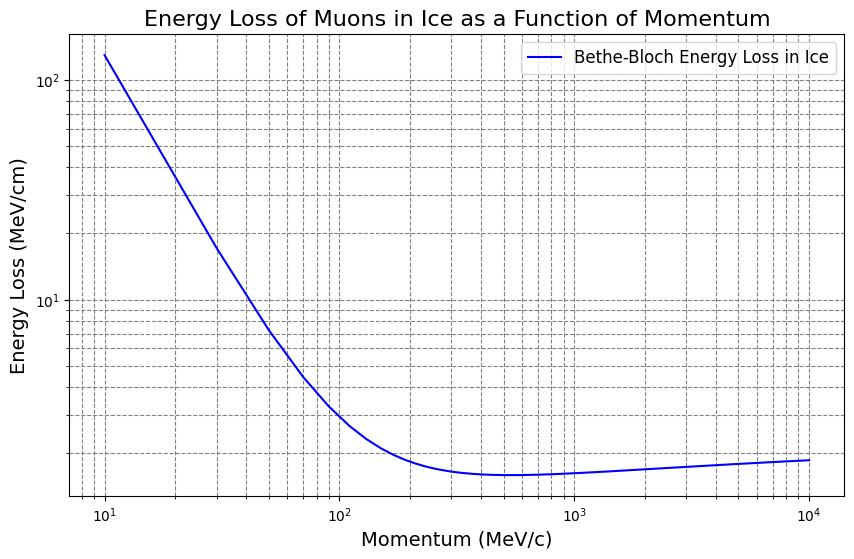

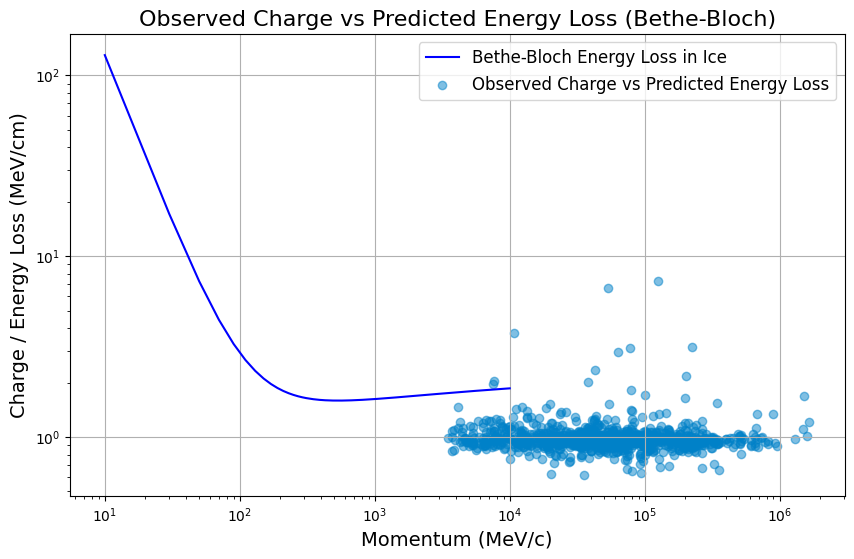

In [110]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, log

# Constants
K = 0.307075  # MeV g^-1 cm^2
z = 1  # muon charge
Z = 7.42  # Effective atomic number for ice (H2O)
A = 18.015  # Atomic mass of ice (water) in g/mol
m_mu = 105.66  # MeV/c^2, muon mass
m_e = 0.511  # MeV/c^2, electron mass
rho = 0.917  # g/cm^3, density of ice
I = 0.000078  # MeV (mean excitation potential of ice, 78 eV)

# Define functions for beta, gamma, and T_max
gamma = lambda p: sqrt(1 + (p / m_mu) ** 2)
beta = lambda p: sqrt(1 - 1 / gamma(p) ** 2)
beta_gamma = lambda p: p / m_mu
T_max = lambda p: 2 * m_e * (beta_gamma(p)) ** 2 / (1 + 2 * gamma(p) * m_e / m_mu + (m_e / m_mu) ** 2)

# Calculate plasma frequency
h_omega_p = sqrt(rho * Z / A) * 28.816 / 1e6  # Convert to MeV

# Define the Bethe-Bloch formula for energy loss in ice
def dE_over_dX(p):
    beta_val = beta(p)
    return K * z**2 * (Z / A) / beta_val**2 * (
        0.5 * log(2 * m_e * T_max(p) / h_omega_p**2) - beta_val**2 + 0.5
    )

# Momentum range (in MeV/c)
momenta = np.linspace(10, 10000, 500)  # Momentum range from 10 MeV/c to 10,000 MeV/c

# Calculate energy loss for each momentum value
dE_dx_values = np.array([dE_over_dX(p) for p in momenta])

# Plot the Bethe-Bloch curve
plt.figure(figsize=(10, 6))
plt.plot(momenta, dE_dx_values, label='Bethe-Bloch Energy Loss in Ice', color='blue')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Momentum (MeV/c)', fontsize=14)
plt.ylabel('Energy Loss (MeV/cm)', fontsize=14)
plt.title('Energy Loss of Muons in Ice as a Function of Momentum', fontsize=16)
plt.grid(True, which="both", ls="--", color='gray')
plt.legend(fontsize=12)

# Assuming df_truth['event_no'] contains the event IDs corresponding to df_merged['event_no']
# Step 1: Group by event and calculate the average observed charge per event
average_charge_per_event = df_merged.groupby('event_no')['charge'].mean()

# Step 2: Match the average charges to the initial energy/momentum per event
# Ensure both df_truth and df_merged are aligned by event_no
aligned_energy = df_truth.set_index('event_no')['energy'] * 1000  # Energy in MeV
aligned_momentum = estimate_initial_momentum(aligned_energy.values)

# Step 3: Plot the average observed charge vs the corresponding initial momentum for each event
plt.figure(figsize=(10, 6))

# Plot Bethe-Bloch theoretical curve
plt.plot(momenta, dE_dx_values, label='Bethe-Bloch Energy Loss in Ice', color='blue')
plt.xscale('log')
plt.yscale('log')

# Scatter plot: Observed charge vs momentum
plt.scatter(aligned_momentum, average_charge_per_event, label='Observed Charge vs Predicted Energy Loss', alpha=0.5)

# Add plot labels and title
plt.xlabel('Momentum (MeV/c)', fontsize=14)
plt.ylabel('Charge / Energy Loss (MeV/cm)', fontsize=14)
plt.title('Observed Charge vs Predicted Energy Loss (Bethe-Bloch)', fontsize=16)
plt.grid(True)
plt.legend(fontsize=12)

plt.show()



In [10]:

# Constants
c = 2.998e8  # Speed of light in vacuum (m/s)
n_ice = 1.33  # Refractive index of ice
v_photon = c / n_ice  # Speed of light in ice (m/s)
v_muon = 0.29979 * c  # Speed of muon in ice (m/s)
theta_c = np.arccos(1 / n_ice)  # Cherenkov angle in radians
def path(df):
    x = df['position_x']
    y = df['position_y']
    z = df['position_z']
    zenith = df['zenith']
    azimuth = df['azimuth']
    track_length = df['track_length']
    x_end = x + track_length*np.sin(zenith)*np.cos(azimuth)
    y_end = y + track_length*np.sin(zenith)*np.sin(azimuth)
    z_end = z + track_length*np.cos(zenith)
    return x, y, z, x_end, y_end, z_end

def reconstruct_photon_emission(muon_start, muon_end, dom_position):
    muon_start = np.array(muon_start)
    muon_end = np.array(muon_end)
    dom_position = np.array(dom_position)

    muon_dir = muon_end - muon_start
    muon_dir = muon_dir + 1e-10  # Avoid division by zero
    muon_dir_norm = muon_dir / np.linalg.norm(muon_dir)

    vec_dom = dom_position - muon_start
    projection_length = np.dot(vec_dom, muon_dir_norm)
    closest_point = muon_start + projection_length * muon_dir_norm

    distance_closest_to_dom = np.linalg.norm(dom_position - closest_point)
    perpendicular_distance = distance_closest_to_dom * np.tan(theta_c)
    emission_point = closest_point - perpendicular_distance * muon_dir_norm

    photon_distance = np.linalg.norm(emission_point - dom_position)
    photon_direction = dom_position - emission_point
    photon_zenith = np.arccos(photon_direction[2] / np.linalg.norm(photon_direction))
    photon_azimuth = np.arctan2(photon_direction[1], photon_direction[0])

    return emission_point, photon_distance, photon_azimuth, photon_zenith


In [11]:
df_splits.head()

,pmt_dir_x,pmt_dir_y,pmt_dir_z,charge,dom_time,width,dom_x,dom_y,dom_z,pmt_area,rde,is_bright_dom,is_bad_dom,is_saturated_dom,is_errata_dom,event_time,hlc,awtd,string,pmt_number,dom_number,dom_type,event_no
0,0.000000,0.000000e+00,-1.000000,0.993904,9499.823188,6.25,-77.800000,-54.330000,-467.480000,0.044400,1.0,-1.0,-1.0,-1.0,-1.0,59000.171844,0.0,0.0,35.0,0.0,58.0,20.0,0
15,0.878662,-3.639536e-01,-0.309017,0.991164,9961.927319,2.00,18.415034,-51.105541,-472.991473,0.008171,1.0,-1.0,-1.0,-1.0,-1.0,59000.171844,0.0,1.0,92.0,19.0,107.0,130.0,0
14,-0.363954,8.786616e-01,0.309017,1.541796,10541.815401,2.00,18.238209,-50.928716,-445.868527,0.008171,1.0,-1.0,-1.0,-1.0,-1.0,59000.171844,0.0,1.0,92.0,6.0,98.0,130.0,0
13,-0.544639,-1.010281e-08,0.838671,1.436190,10123.037155,2.00,47.213914,-57.012500,-526.785338,0.008171,1.0,-1.0,-1.0,-1.0,-1.0,59000.171844,0.0,1.0,91.0,2.0,118.0,130.0,0
12,0.000000,0.000000e+00,-1.000000,0.913178,9987.140542,2.00,47.290000,-57.012500,-479.177000,0.032429,1.0,-1.0,-1.0,-1.0,-1.0,59000.171844,0.0,1.0,91.0,0.0,109.0,120.0,0


In [10]:
df_splits = df_splits.sort_values(by=['event_no', 'dom_time'])

df_secondary = df_secondary.sort_values(by=['EventID'])
grouped_by_event = df_splits.groupby('event_no')
DOM_pos = list(zip(df_splits['dom_x'], df_splits['dom_y'], df_splits['dom_z']))
Dom_time = df_splits['dom_time'].values
charges_data = df_splits['charge'].values
Muon_start_pos = list(zip(df_secondary['X_position_MuPlus'], df_secondary['Y_position_MuPlus'], df_secondary['Z_position_MuPlus'], df_secondary['Azimuth_MuPlus'], df_secondary['Zenith_MuPlus'], df_secondary['Length_MuPlus']))
Muon_time = df_secondary['Time_MuPlus'].values

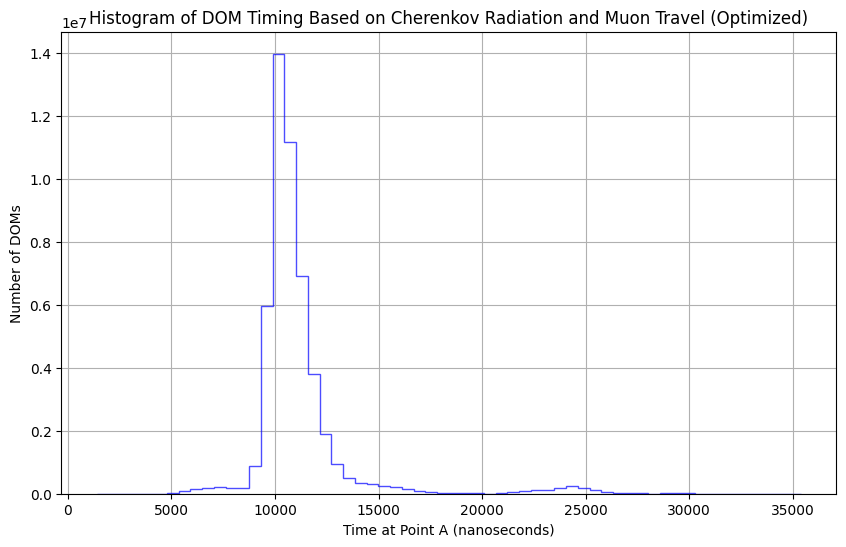

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
c = 0.299792458  # Speed of light in vacuum (m/ns)
n_ice = 1.34  # Refractive index of ice
v_photon = c / n_ice  # Speed of light in ice
v_muon = 0.98 * c  # Muon velocity (assumed to be close to the speed of light)
theta_c = np.arccos(1 / n_ice)  # Cherenkov angle in radians
ns_conversion = 1
# Function to compute DOM timing based on input data structure
def calculate_dom_timing_optimized(DOM_pos, Dom_time, Muon_start_pos, Muon_time):
    dom_timings = []

    # Precompute muon start points and directions
    muon_start_array = np.array(Muon_start_pos)[:, :3]  # Extract x, y, z only
    azimuths = np.array(Muon_start_pos)[:, 3]
    zeniths = np.array(Muon_start_pos)[:, 4]
    lengths = np.array(Muon_start_pos)[:, 5]

    # Precompute muon endpoints
    x_end = muon_start_array[:, 0] + lengths * np.sin(zeniths) * np.cos(azimuths)
    y_end = muon_start_array[:, 1] + lengths * np.sin(zeniths) * np.sin(azimuths)
    z_end = muon_start_array[:, 2] + lengths * np.cos(zeniths)
    muon_end_array = np.vstack((x_end, y_end, z_end)).T

    # Convert DOM positions to NumPy array
    dom_positions = np.array(DOM_pos)

    # Iterate over each muon track
    for i, (muon_start, muon_end) in enumerate(zip(muon_start_array, muon_end_array)):
        dom_times_for_muon = []

        # Vectorized calculation for all DOMs at once
        vec_dom = dom_positions - muon_start  # Vector from muon start to each DOM
        muon_dir = muon_end - muon_start
        muon_dir_norm_val = np.linalg.norm(muon_dir)  # Norm of muon direction 
        if muon_dir_norm_val == 0:
            continue 
        muon_dir_norm = muon_dir / muon_dir_norm_val  # Normalize direction
        
        # Project DOM vector onto the muon direction
        projection_lengths = np.dot(vec_dom, muon_dir_norm)
        closest_points = muon_start + np.outer(projection_lengths, muon_dir_norm)

        # Calculate distances between closest point on muon track and DOMs
        distances_closest_to_dom = np.linalg.norm(dom_positions - closest_points, axis=1)

        # Calculate photon emission points
        perpendicular_distances = distances_closest_to_dom * np.tan(theta_c)
        emission_points = closest_points - np.outer(perpendicular_distances, muon_dir_norm)

        # Calculate photon travel distances and times
        photon_distances = np.linalg.norm(dom_positions - emission_points, axis=1)
        t_photon = photon_distances / v_photon

        # Calculate muon travel time from point A (end of muon track) to emission point
        d_A_Cher = np.linalg.norm(muon_end - emission_points, axis=1)
        t_muon = d_A_Cher / v_muon

        # Calculate the DOM signal time based on photon travel time and muon travel time
        t_dom = Dom_time - t_photon + t_muon
        
        dom_timings.append(t_dom)

    return np.concatenate(dom_timings)

# Call the calculate_dom_timing_optimized function with your data
dom_timings = calculate_dom_timing_optimized(DOM_pos, Dom_time, Muon_start_pos, Muon_time)

# Plot the DOM timings as a histogram
plt.figure(figsize=(10, 6))
plt.hist(dom_timings, bins=60, color='blue', histtype = 'step', alpha=0.7)
plt.xlabel('Time at Point A (nanoseconds)')
plt.ylabel('Number of DOMs')
plt.title('Histogram of DOM Timing Based on Cherenkov Radiation and Muon Travel (Optimized)')
plt.grid(True)
plt.show()


In [14]:
# Function to shift timings so that each event signal has the same mean (chosen as zero)
def shift_dom_timing(dom_timings, window_ns):
    window = window_ns  # Convert the 400 ns window into seconds
    
    # Remove NaN values from dom_timings
    dom_timings = dom_timings[~np.isnan(dom_timings)]

    # Calculate the median of the DOM timings
    median_timing = np.median(dom_timings)

    # Identify t_A values within the 400 ns window around the median
    timings_in_window = dom_timings[(dom_timings >= median_timing - window) & (dom_timings <= median_timing + window)]

    # Calculate the mean of the values within the window
    mean_timing = np.mean(timings_in_window)

    # Shift all timings so the mean is zero
    shifted_timings = dom_timings - mean_timing

    return shifted_timings, median_timing, mean_timing, window

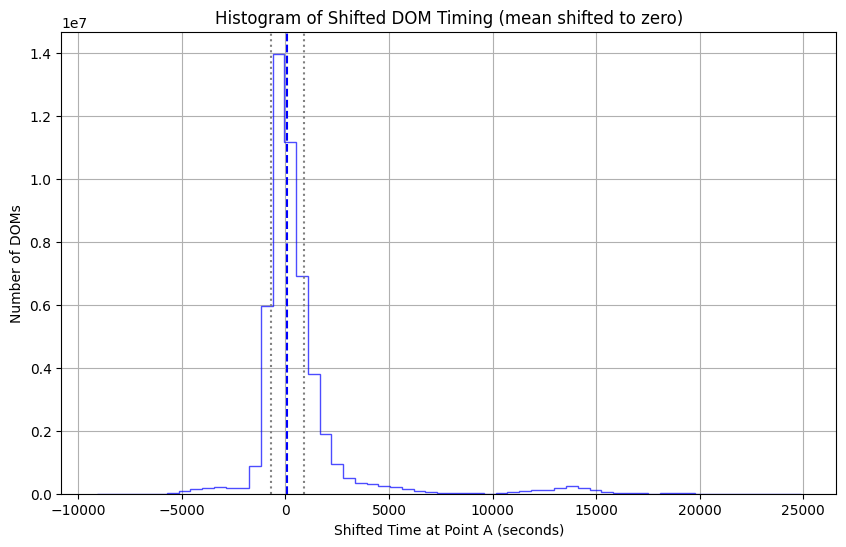

In [15]:
# Shift the DOM timings so the signal mean is zero
shifted_dom_timings, median_timing, mean_timing, window = shift_dom_timing(dom_timings, window_ns=800)

# Plot the shifted DOM timings as a histogram
plt.figure(figsize=(10, 6))
plt.hist(shifted_dom_timings, bins=60, color='blue', alpha=0.7, histtype='step')

plt.axvline(median_timing - mean_timing, color='blue', linestyle='--', label='Median Shifted to Zero')
plt.axvline(median_timing - mean_timing - window, color='gray', linestyle=':', label='Timing Window')
plt.axvline(median_timing - mean_timing + window, color='gray', linestyle=':')
plt.xlabel('Shifted Time at Point A (seconds)')
plt.ylabel('Number of DOMs')
plt.title('Histogram of Shifted DOM Timing (mean shifted to zero)')
plt.grid(True)
plt.show()

/groups/icecube/simon/Icecube/src/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/groups/icecube/simon/Icecube/src/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Mean total number of pulses per event: 64.6619411123228
Median total number of pulses per event: 37.0
Mean number of pulses in time window per event: 55.721919302071974
Median number of pulses in time window per event: 31.0


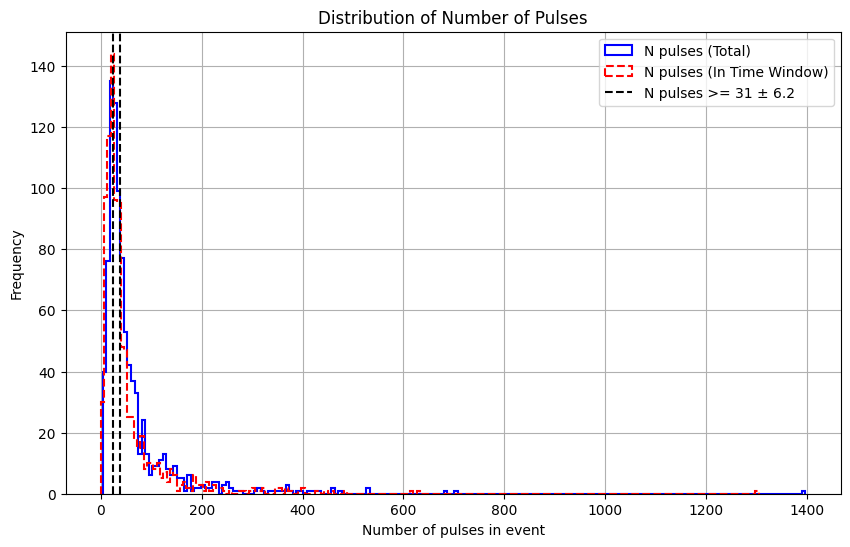

In [16]:
def calculate_pulse_counts(dom_timings, window_ns=800):
    total_pulses = len(dom_timings)
    
    # Convert window to seconds (ns to s)
    window = window_ns

    # Remove NaN values from dom_timings
    dom_timings = dom_timings[~np.isnan(dom_timings)]

    if len(dom_timings) == 0:
        return total_pulses, 0

    # Calculate the median of the DOM timings
    median_timing = np.median(dom_timings)

    # Identify pulses (DOMs) within the 400 ns window around the median
    pulses_in_window = dom_timings[(dom_timings >= median_timing - window) & (dom_timings <= median_timing + window)]
    
    # Number of pulses in time window
    pulses_in_window_count = len(pulses_in_window)
    median_pulse = np.median(pulses_in_window)
    mean_pulse = np.mean(pulses_in_window)
    return total_pulses, pulses_in_window_count

total_pulses_list = []
pulses_in_window_list = []

# Iterate through all events in the dataset
for event_no, group in grouped_by_event:
    dom_timings = group['dom_time'].values

    total_pulses, pulses_in_window = calculate_pulse_counts(dom_timings)
    
    total_pulses_list.append(total_pulses)
    pulses_in_window_list.append(pulses_in_window)

# Convert lists to NumPy arrays for easier calculations
total_pulses_array = np.array(total_pulses_list)
pulses_in_window_array = np.array(pulses_in_window_list)

# Calculate the mean and median for total pulses and pulses in the time window
mean_total_pulses = np.mean(total_pulses_array)
median_total_pulses = np.median(total_pulses_array)

mean_pulses_in_window = np.mean(pulses_in_window_array)
median_pulses_in_window = np.median(pulses_in_window_array)

# Print the results
print(f"Mean total number of pulses per event: {mean_total_pulses}")
print(f"Median total number of pulses per event: {median_total_pulses}")

print(f"Mean number of pulses in time window per event: {mean_pulses_in_window}")
print(f"Median number of pulses in time window per event: {median_pulses_in_window}")

# Plot the histograms
plt.figure(figsize=(10, 6))

# Total number of pulses
plt.hist(total_pulses_list, bins=200, histtype='step', color='blue', label='N pulses (Total)', linewidth=1.5)

# Number of pulses in the time window
plt.hist(pulses_in_window_list, bins=200, histtype='step', color='red', linestyle='--', label='N pulses (In Time Window)', linewidth=1.5)

# Add vertical lines for the pulse count requirement (15 ± 3)
plt.axvline(31 - 6.2, color='black', linestyle='--', label='N pulses >= 31 ± 6.2')
plt.axvline(31 + 6.2, color='black', linestyle='--')

plt.xlabel('Number of pulses in event')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Pulses')
plt.legend()
plt.grid(True)
plt.show()


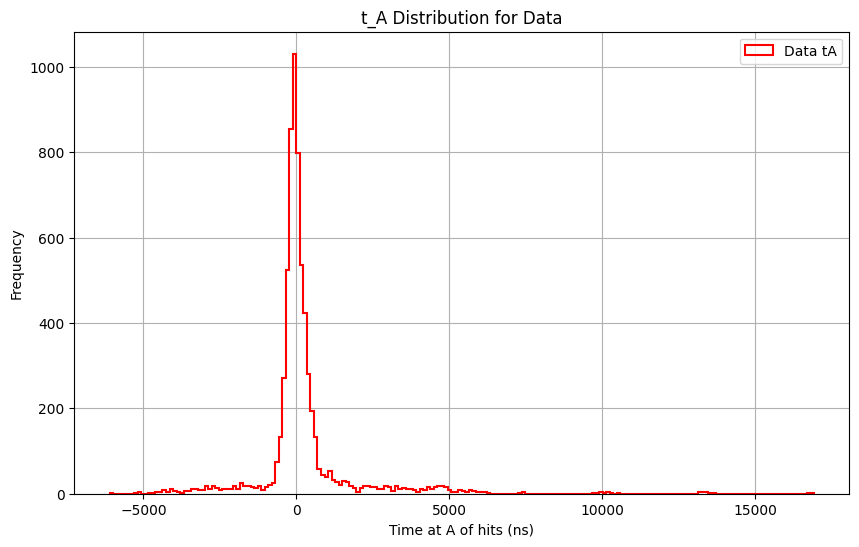

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
ns_conversion = 1  # Conversion factor for nanoseconds to seconds

# Function to shift DOM timings for t_A calculation
def shift_dom_timing(dom_timings, window_ns=800):
    # Convert the 400 ns window into seconds
    window = window_ns * ns_conversion

    # Remove NaN values from dom_timings
    dom_timings = dom_timings[~np.isnan(dom_timings)]

    # Calculate the median of the DOM timings
    if len(dom_timings) == 0:
        return np.array([])

    median_timing = np.median(dom_timings)

    # Identify t_A values within the 400 ns window around the median
    timings_in_window = dom_timings[(dom_timings >= median_timing - window) & (dom_timings <= median_timing + window)]

    # Calculate the mean of the values within the window
    mean_timing = np.mean(timings_in_window) if len(timings_in_window) > 0 else 0

    # Shift all timings so the mean is zero
    shifted_timings = dom_timings - mean_timing

    return shifted_timings

# Function to compute t_A for all viable events
def calculate_ta_for_events(viable_dom_times):
    ta_values = []

    # Iterate through each viable event
    for dom_timings in viable_dom_times:
        shifted_ta = shift_dom_timing(dom_timings)
        if len(shifted_ta) > 0:
            ta_values.extend(shifted_ta)  # Collect all t_A values
    
    return np.array(ta_values)

# Filter the viable DOM timings from df_splits based on the number of pulses (32 ± 6.4)
# Assuming the data is sorted by event_no and you are grouping them by event

# Group the data by 'event_no'
grouped_by_event = df_splits.groupby('event_no')

# Threshold for viable events (32 ± 6.4 pulses)
min_pulses = 31 - 6.2
max_pulses = 31 + 6.2

# Prepare a list to store viable DOM timings for t_A calculation
viable_dom_times_data = []

# Function to calculate number of pulses in an event and apply pulse filter
def calculate_pulse_counts(dom_timings, window_ns=800):
    total_pulses = len(dom_timings)
    
    # Convert window to seconds (ns to s)
    window = window_ns  

    # Remove NaN values from dom_timings
    dom_timings = dom_timings[~np.isnan(dom_timings)]

    if len(dom_timings) == 0:
        return total_pulses, 0

    # Calculate the median of the DOM timings
    median_timing = np.median(dom_timings)

    # Identify pulses (DOMs) within the 400 ns window around the median
    pulses_in_window = dom_timings[(dom_timings >= median_timing - window) & (dom_timings <= median_timing + window)]
    
    # Number of pulses in time window
    pulses_in_window_count = len(pulses_in_window)
    
    return total_pulses, pulses_in_window_count

# Iterate through each group (i.e., each event)
for event_no, group in grouped_by_event:
    # Extract the DOM timings for this event
    dom_timings = group['dom_time'].values
    
    # Calculate the total pulses and pulses in the time window
    total_pulses, pulses_in_window = calculate_pulse_counts(dom_timings)
    
    # Apply the mask for viable events, which is at least 31 pulses
    if total_pulses >= min_pulses and total_pulses <= max_pulses:
        viable_dom_times_data.append(dom_timings)

# Calculate t_A values for the viable data events
ta_values_data = calculate_ta_for_events(viable_dom_times_data)

# Plot the histogram for the data's t_A values
plt.figure(figsize=(10, 6))

# Histogram for Data t_A values
plt.hist(ta_values_data, bins=200, histtype='step', color='red', label='Data tA', linewidth=1.5)  # Convert back to ns

# Formatting the plot
plt.xlabel('Time at A of hits (ns)')
plt.ylabel('Frequency')
plt.title('t_A Distribution for Data')
plt.legend()
plt.grid(True)
plt.show()


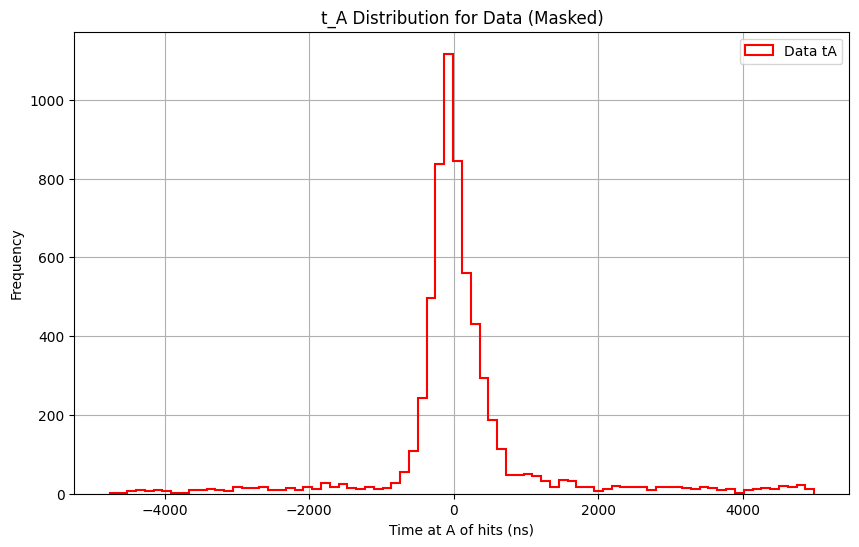

In [18]:
# Generate the same plot, but limit the data to -1000 to 1500 ns
mask = (ta_values_data >= -5000) & (ta_values_data <= 5000)
ta_values_data_masked = ta_values_data[mask]

# Plot the histogram for the masked data's t_A values
plt.figure(figsize=(10, 6))

# Histogram for Data t_A values
plt.hist(ta_values_data_masked, bins=80, histtype='step', color='red', label='Data tA', linewidth=1.5)  # Convert back

# Formatting the plot
plt.xlabel('Time at A of hits (ns)')
plt.ylabel('Frequency')
plt.title('t_A Distribution for Data (Masked)')
plt.legend()
plt.grid(True)
plt.show()

/tmp/ipykernel_2448116/548471556.py:42: FutureWarning: make_func_code is deprecated: Use of ``func_code`` attribute to declare parameters is deprecated. Use ``_parameters`` instead, which is a dict of parameter names to limits.
  self.func_code = make_func_code(describe(self.f)[1:])


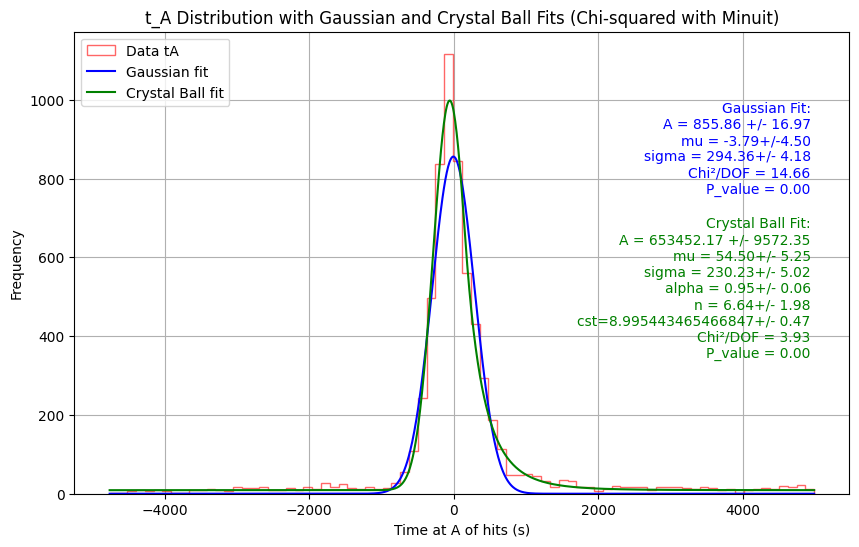

Gaussian fit parameters: A = 855.8632119078254, mu = -3.7884439234100067, sigma = 294.3624773934221


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import crystalball, chi2
from iminuit import Minuit

from iminuit.util import make_func_code
from iminuit import describe #, Minuit,

def set_var_if_None(var, x):
    if var is not None:
        return np.array(var)
    else: 
        return np.ones_like(x)
    
def compute_f(f, x, *par):
    
    try:
        return f(x, *par)
    except ValueError:
        return np.array([f(xi, *par) for xi in x])


class Chi2Regression:  # override the class with a better one
        
    def __init__(self, f, x, y, sy=None, weights=None, bound=None):
        
        if bound is not None:
            x = np.array(x)
            y = np.array(y)
            sy = np.array(sy)
            mask = (x >= bound[0]) & (x <= bound[1])
            x  = x[mask]
            y  = y[mask]
            sy = sy[mask]

        self.f = f  # model predicts y for given x
        self.x = np.array(x)
        self.y = np.array(y)
        
        self.sy = set_var_if_None(sy, self.x)
        self.weights = set_var_if_None(weights, self.x)
        self.func_code = make_func_code(describe(self.f)[1:])

        
    def __call__(self, *par):  # par are a variable number of model parameters
        
        # compute the function value
        f = compute_f(self.f, self.x, *par)
        
        # compute the chi2-value
        chi2 = np.sum(self.weights*(self.y - f)**2/self.sy**2)
        
        return chi2

# Define Gaussian function
def gaussian(x, A, mu, sigma):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))

# Define Crystal Ball function with free alpha and n
def crystal_ball(x, alpha, n, mu, sigma, A, cst):
    return A * crystalball.pdf(-x, beta=alpha, m=n, loc=mu, scale=sigma) + cst

def func_CBpol0(x, N, mu, sigma, beta, m, cst) : # Troels CB function
    xmax = np.max(x)
    xmin = np.min(x)
    Nbins = 80
    binwidth_gauss = (xmax-xmin)/Nbins
    return N * binwidth_gauss * crystalball.pdf(-x, beta, m, loc=mu, scale=sigma) + cst

# Generate the histogram data from the t_A values
ta_values_ns = ta_values_data_masked  # Assuming ta_values_data is already in nanoseconds
bins = 80
hist, bin_edges = np.histogram(ta_values_ns, bins=bins)

# Midpoints of bins for fitting
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

# Set uncertainties (e.g., sqrt of counts) and weights
sy = np.sqrt(hist + 1)  # Set uncertainty to sqrt(counts) to avoid zero uncertainties
weights = np.ones_like(hist)  # You can customize weights if needed

# Step 1: Perform Chi2 regression for Gaussian
chi2_gauss = Chi2Regression(gaussian, bin_centers, hist, sy=sy, weights=weights)
m_gauss = Minuit(chi2_gauss, A=np.max(hist), mu=np.mean(ta_values_ns), sigma=np.std(ta_values_ns))
m_gauss.limits['A'] = (0, None)  # Set lower bound for amplitude
m_gauss.limits['sigma'] = (0, None)  # Set lower bound for sigma
m_gauss.errordef = 1
m_gauss.migrad()  # Perform the minimization

# Step 2: Perform Chi2 regression for Crystal Ball with free alpha and n
chi2_cb = Chi2Regression(crystal_ball, bin_centers, hist, sy=sy, weights=weights)
m_cb = Minuit(chi2_cb, alpha=1.5, n=3.0, mu=m_gauss.values['mu'], sigma=m_gauss.values['sigma'], A=m_gauss.values['A'], cst=0)
m_cb.limits['alpha'] = (0.1, 10)  # Reasonable bounds for alpha
m_cb.limits['n'] = (1, 10)  # Reasonable bounds for n
m_cb.limits['sigma'] = (10, None)  # Set a lower bound for sigma to avoid collapsing
m_cb.limits['A'] = (0, None)  # Set lower bound for amplitude
m_cb.limits['cst'] = (0, None)  # Set lower bound for constant term
m_cb.errordef = 1
m_cb.migrad()  # Perform the minimization

chi2_CBpol0 = Chi2Regression(func_CBpol0, bin_centers, hist, sy=sy, weights=weights)
m_CBpol0 = Minuit(chi2_CBpol0, N=np.max(hist), mu=np.mean(ta_values_ns), sigma=np.std(ta_values_ns), beta=1.5, m=3.0, cst=0)
m_CBpol0.limits['N'] = (0, None)  # Set lower bound for amplitude
m_CBpol0.limits['sigma'] = (0, None)  # Set lower bound for sigma
m_CBpol0.limits['beta'] = (0.1, 10)  # Reasonable bounds for alpha
m_CBpol0.limits['m'] = (1, 10)  # Reasonable bounds for n
m_CBpol0.limits['cst'] = (0, None)  # Set lower bound for constant term
m_CBpol0.errordef = 1
m_CBpol0.migrad()  # Perform the minimization

# Compute chi-squared and degrees of freedom (DOF)
chi2_gauss_val = m_gauss.fval
dof_gauss = len(hist) - len(m_gauss.parameters)
red_chi2_gauss = chi2_gauss_val / dof_gauss
p_value_gauss = chi2.sf(chi2_gauss_val, dof_gauss)
# Find the uncertainties on the parameters


chi2_cb_val = m_cb.fval
dof_cb = len(hist) - len(m_cb.parameters)
red_chi2_cb = chi2_cb_val / dof_cb
p_value_cb = chi2.sf(chi2_cb_val, dof_cb)

chi2_CBpol0_val = m_CBpol0.fval
dof_CBpol0 = len(hist) - len(m_CBpol0.parameters)
red_chi2_CBpol0 = chi2_CBpol0_val / dof_CBpol0
p_value_CBpol0 = chi2.sf(chi2_CBpol0_val, dof_CBpol0)


# Plot the histogram of the data
plt.figure(figsize=(10, 6))
plt.hist(ta_values_ns, bins=bins, alpha=0.6, label='Data tA', color='red', histtype='step')

# Plot the Gaussian fit
x_fit = np.linspace(min(ta_values_ns), max(ta_values_ns), 1000)
plt.plot(x_fit, gaussian(x_fit, m_gauss.values['A'], m_gauss.values['mu'], m_gauss.values['sigma']), label='Gaussian fit', color='blue')

# Plot the Crystal Ball fit with free alpha, n
plt.plot(x_fit, crystal_ball(x_fit, m_cb.values['alpha'], m_cb.values['n'], m_cb.values['mu'], m_cb.values['sigma'], m_cb.values['A'],m_cb.values['cst']), label='Crystal Ball fit', color='green')

#plt.plot(x_fit, func_CBpol0(x_fit, m_CBpol0.values['N'], m_CBpol0.values['mu'], m_CBpol0.values['sigma'], m_CBpol0.values['beta'], m_CBpol0.values['m'], m_CBpol0.values['cst']), label='CBpol0 fit', color='green')

# Add text with fit parameters and chi2 values
plt.text(0.95, 0.85, f"Gaussian Fit:\nA = {m_gauss.values['A']:.2f} +/- {m_gauss.errors['A']:.2f}\nmu = {m_gauss.values['mu']:.2f}+/-{m_gauss.errors['mu']:.2f}\nsigma = {m_gauss.values['sigma']:.2f}+/- {m_gauss.errors['sigma']:.2f}\nChi²/DOF = {red_chi2_gauss:.2f}\nP_value = {p_value_gauss:.2f}", 
         horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes, color='blue')

plt.text(0.95, 0.60, f"Crystal Ball Fit:\nA = {m_cb.values['A']:.2f} +/- {m_cb.errors['A']:.2f}\nmu = {m_cb.values['mu']:.2f}+/- {m_cb.errors['mu']:.2f}\nsigma = {m_cb.values['sigma']:.2f}+/- {m_cb.errors['sigma']:.2f}\nalpha = {m_cb.values['alpha']:.2f}+/- {m_cb.errors['alpha']:.2f}\nn = {m_cb.values['n']:.2f}+/- {m_cb.errors['n']:.2f}\ncst={m_cb.values['cst']}+/- {m_cb.errors['cst']:.2f}\nChi²/DOF = {red_chi2_cb:.2f}\nP_value = {p_value_cb:.2f}", 
         horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes, color='green')
#plt.text(0.95,0.60, f"CBpol0 Fit:\nN = {m_CBpol0.values['N']:.2f} +/- {m_CBpol0.errors['N']:.2f}\nmu = {m_CBpol0.values['mu']:.2f} +/- {m_CBpol0.errors['mu']:.2f}\nsigma = {m_CBpol0.values['sigma']:.2f}+/- {m_CBpol0.errors['sigma']:.2f}\nbeta = {m_CBpol0.values['beta']:.2f}+/- {m_CBpol0.errors['beta']:.2f}\nm = {m_CBpol0.values['m']:.2f}+/- {m_CBpol0.errors['m']:.2f}\ncst={m_CBpol0.values['cst']:.2f}+/- {m_CBpol0.errors['cst']:.2f}\nChi²/DOF = {red_chi2_CBpol0:.2f}\nP_value = {p_value_CBpol0:.2f}",
#         horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes, color='green')
# Formatting the plot
plt.xlabel('Time at A of hits (s)')
plt.ylabel('Frequency')
plt.title('t_A Distribution with Gaussian and Crystal Ball Fits (Chi-squared with Minuit)')
plt.legend()
plt.grid(True)
plt.show()

# Print the fit parameters
print(f"Gaussian fit parameters: A = {m_gauss.values['A']}, mu = {m_gauss.values['mu']}, sigma = {m_gauss.values['sigma']}")
#print(f"Crystal Ball fit parameters: alpha = {m_cb.values['alpha']}, n = {m_cb.values['n']}, mu = {m_cb.values['mu']}, sigma = {m_cb.values['sigma']}, A = {m_cb.values['A']}")

In [20]:
import sys
sys.path.append('/groups/icecube/simon/GNN/workspace/External_Functions')
from ExternalFunctions import Chi2Regression, BinnedLH, UnbinnedLH
from ExternalFunctions import nice_string_output, add_text_to_ax


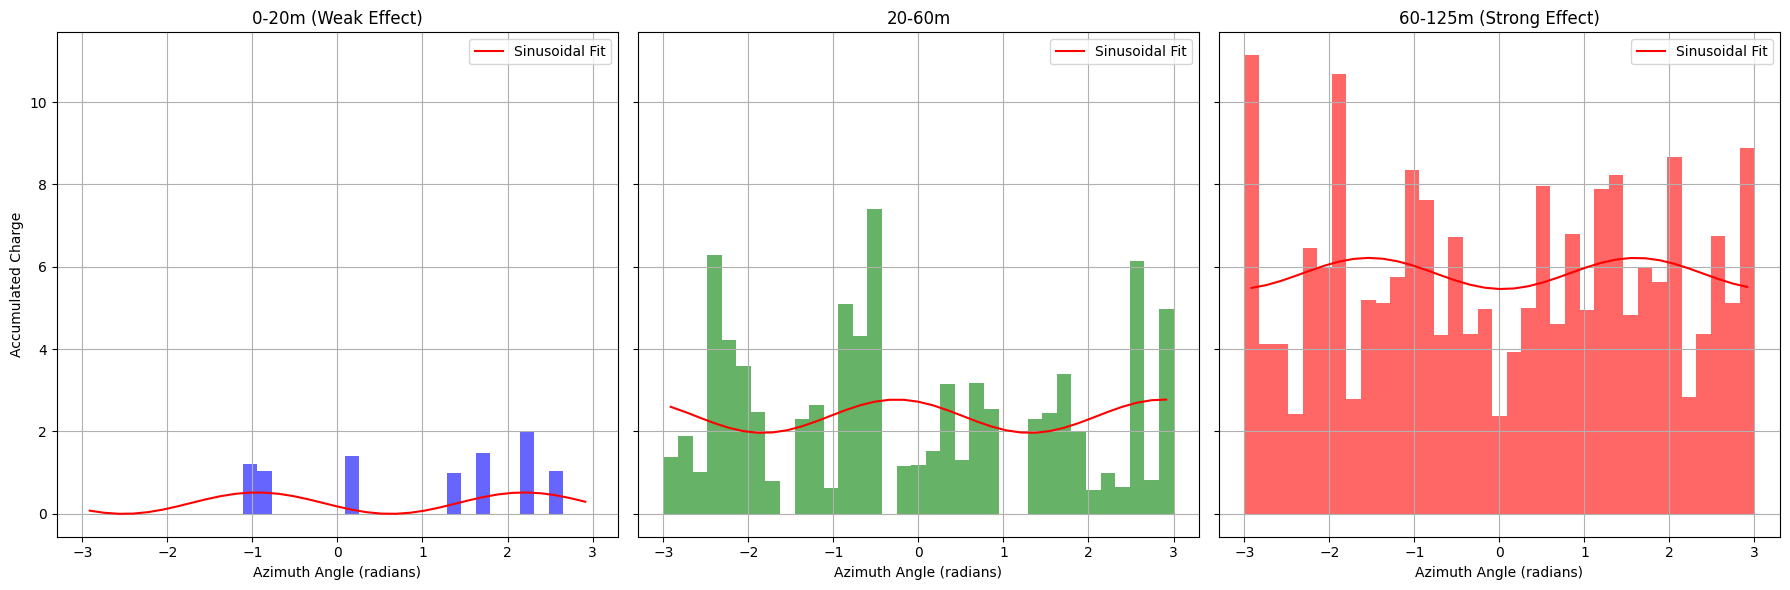

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Function to model a sinusoidal pattern with peaks (frequency of k = 2)
def sinusoidal_model(azimuth, A, B, C):
    return A * np.sin(2 * azimuth + B) + C


photon_azimuths = []  # Fill with photon azimuth values from reconstruct_photon_emission
charges = []  # Fill with associated charges/intensities from your data
photon_distances = []  # Fill with photon travel distances from reconstruct_photon_emission

# Example loop to fill photon_azimuths, charges, and distances using reconstruct_photon_emission
for i in range(len(Muon_start_pos)):  # Assuming Muon_start_pos, DOM_pos are predefined
    muon_start = np.array([Muon_start_pos[i][0], Muon_start_pos[i][1], Muon_start_pos[i][2]])
    muon_end = muon_start + Muon_start_pos[i][5] * np.array([
        np.sin(Muon_start_pos[i][4]) * np.cos(Muon_start_pos[i][3]),
        np.sin(Muon_start_pos[i][4]) * np.sin(Muon_start_pos[i][3]),
        np.cos(Muon_start_pos[i][4])
    ])
    dom_position = np.array([DOM_pos[i][0], DOM_pos[i][1], DOM_pos[i][2]])
    
    # Reconstruct emission point and angles
    emission_point, photon_distance, photon_azimuth, photon_zenith = reconstruct_photon_emission(
        muon_start, muon_end, dom_position)
    
    # Append azimuth angle, charge, and distance (replace charge with actual data extraction)
    photon_azimuths.append(photon_azimuth)
    charges.append(charges_data[i])  # Replace with actual charge/intensity extraction
    photon_distances.append(photon_distance)

# Convert to numpy arrays
photon_azimuths = np.array(photon_azimuths)
charges = np.array(charges)
photon_distances = np.array(photon_distances)

# Define bins for azimuth angles
bins = np.linspace(-3, 3, 36)  # 36 bins covering -3 to 3 radians
bin_centers = (bins[:-1] + bins[1:]) / 2

# Define travel distance volumes
volume_1 = (photon_distances >= 0) & (photon_distances < 20)    # Close to emission point
volume_2 = (photon_distances >= 20) & (photon_distances < 60)   # Medium distance
volume_3 = (photon_distances >= 60) & (photon_distances < 125)  # Far from emission point

# Function to process each volume and return bin counts
def process_volume(azimuths, charges):
    # Bin the azimuth angles and sum the associated charges
    bin_counts, _ = np.histogram(azimuths, bins=bins, weights=charges)
    return bin_counts

# Process each volume
bin_counts_1 = process_volume(photon_azimuths[volume_1], charges[volume_1])
bin_counts_2 = process_volume(photon_azimuths[volume_2], charges[volume_2])
bin_counts_3 = process_volume(photon_azimuths[volume_3], charges[volume_3])

# Plotting setup
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot histogram for 0-20m
axs[0].bar(bin_centers, bin_counts_1, width=np.diff(bins), alpha=0.6, color='blue')
popt_1, _ = curve_fit(sinusoidal_model, bin_centers, bin_counts_1, p0=[1, 0, np.mean(bin_counts_1)])
axs[0].plot(bin_centers, sinusoidal_model(bin_centers, *popt_1), color='red', label='Sinusoidal Fit')
axs[0].set_title('0-20m (Weak Effect)')
axs[0].set_xlabel('Azimuth Angle (radians)')
axs[0].set_ylabel('Accumulated Charge')
axs[0].grid(True)

# Plot histogram for 20-60m
axs[1].bar(bin_centers, bin_counts_2, width=np.diff(bins), alpha=0.6, color='green')
popt_2, _ = curve_fit(sinusoidal_model, bin_centers, bin_counts_2, p0=[1, 0, np.mean(bin_counts_2)])
axs[1].plot(bin_centers, sinusoidal_model(bin_centers, *popt_2), color='red', label='Sinusoidal Fit')
axs[1].set_title('20-60m')
axs[1].set_xlabel('Azimuth Angle (radians)')
axs[1].grid(True)

# Plot histogram for 60-125m
axs[2].bar(bin_centers, bin_counts_3, width=np.diff(bins), alpha=0.6, color='red')
popt_3, _ = curve_fit(sinusoidal_model, bin_centers, bin_counts_3, p0=[1, 0, np.mean(bin_counts_3)])
axs[2].plot(bin_centers, sinusoidal_model(bin_centers, *popt_3), color='red', label='Sinusoidal Fit')
axs[2].set_title('60-125m (Strong Effect)')
axs[2].set_xlabel('Azimuth Angle (radians)')
axs[2].grid(True)

# Show plots
for ax in axs:
    ax.legend()
plt.tight_layout()
plt.show()


4.2.2-static


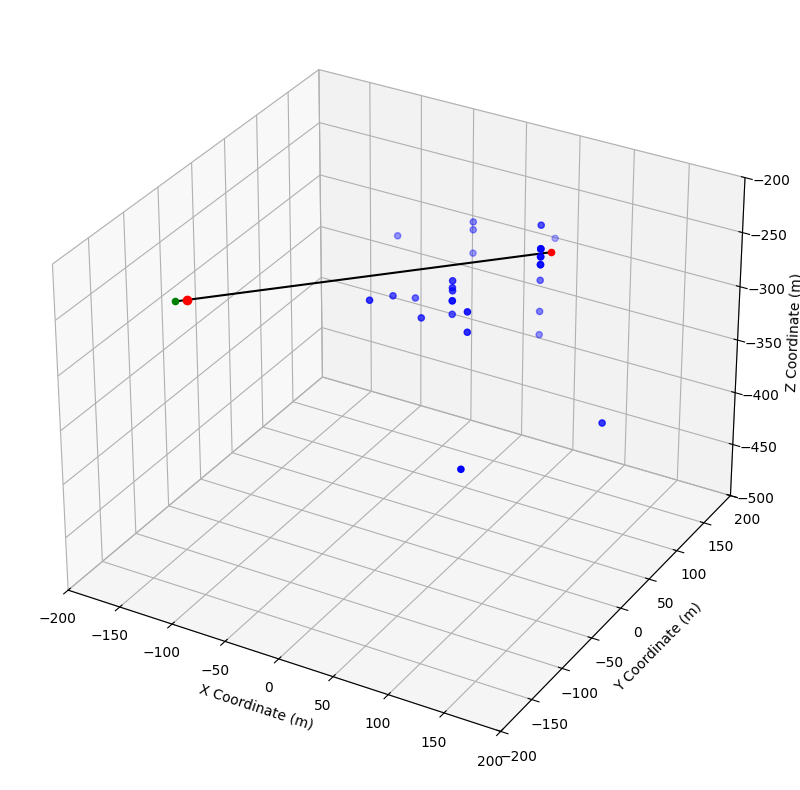

In [22]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import imageio_ffmpeg as ffmpeg
import matplotlib.pyplot as plt
import numpy as np

# Ensure ffmpeg is available
print(ffmpeg.get_ffmpeg_version())
plt.rcParams['animation.ffmpeg_path'] = ffmpeg.get_ffmpeg_exe()

# Speed of light in meters per nanosecond
c = 0.299792458

# Sort the df_splits and df_truth table by event_no and time
df_splits = df_splits.sort_values(by=['event_no', 'dom_time'])
df_truth = df_truth.sort_values(by=['event_no'])

event_no = 10
df_splits_event = df_splits[df_splits['event_no'] == event_no]
df_truth_event = df_truth[df_truth['event_no'] == event_no]

# Calculate the total distance and time for the particle to travel
start_x, start_y, start_z = df_truth_event['position_x'].values[0], df_truth_event['position_y'].values[0], df_truth_event['position_z'].values[0]
end_x, end_y, end_z = df_truth_event['x_end'].values[0], df_truth_event['y_end'].values[0], df_truth_event['z_end'].values[0]
distance = np.sqrt((end_x - start_x)**2 + (end_y - start_y)**2 + (end_z - start_z)**2)
total_time = distance / c

# Create a figure and axis
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Set the axis limits
ax.set_xlim([-200, 200])
ax.set_ylim([-200, 200])
ax.set_zlim([-500, -200])
# Set axis labels
ax.set_xlabel('X Coordinate (m)')
ax.set_ylabel('Y Coordinate (m)')
ax.set_zlabel('Z Coordinate (m)')

# Create a scatter plot of the DOMs
doms = ax.scatter(df_splits_event['dom_x'], df_splits_event['dom_y'], df_splits_event['dom_z'], c='b', marker='o', label='DOMs')

# Create a scatter plot of the start point
start_point = ax.scatter(df_truth_event['position_x'], df_truth_event['position_y'], df_truth_event['position_z'], c='r', marker='o', label='Start Point')

# Create a scatter plot of the end point
end_point = ax.scatter(df_truth_event['x_end'], df_truth_event['y_end'], df_truth_event['z_end'], c='g', marker='o', label='End Point')

# Create a line plot of the track
track, = ax.plot([], [], [], c='k', label='Track')

# Create a scatter plot for the particle
particle, = ax.plot([], [], [], 'ro')

# Function to update the plot for each frame
def update(frame):
    # Update the track
    track.set_data([df_truth_event['position_x'].values[0], df_truth_event['x_end'].values[0]], 
                   [df_truth_event['position_y'].values[0], df_truth_event['y_end'].values[0]])
    track.set_3d_properties([df_truth_event['position_z'].values[0], df_truth_event['z_end'].values[0]])
    
    # Update the figure
    current_time = df_splits_event['dom_time'].iloc[frame]
    doms.set_color(['b' if t <= current_time else 'w' for t in df_splits_event['dom_time']])
    
    # Calculate the elapsed time
    elapsed_time = frame * (total_time / len(df_splits_event))
    
    # Interpolate the particle's position
    t = elapsed_time / total_time
    particle_x = start_x + t * (end_x - start_x)
    particle_y = start_y + t * (end_y - start_y)
    particle_z = start_z + t * (end_z - start_z)
    
    # Update the particle's position
    particle.set_data([particle_x], [particle_y])
    particle.set_3d_properties([particle_z])
    
    # Make the plot rotate
    #ax.view_init(elev=30, azim=frame)
    #Make it so we look from the x-axis
    #ax.view_init(elev=30, azim=90)
    #ax.view_init(elev=30, azim=frame)
    return track, doms, particle

    
# Create an animation
ani = animation.FuncAnimation(fig, update, frames=range(len(df_splits_event)), blit=False)


num_frames = len(df_splits_event)



# Save the animation as an mp4 file
ani.save('particle_path.mp4', writer='ffmpeg', fps=10)

plt.show()

In [23]:
# Print the values of x_end, y_end, and z_end
print("x_end:", df_truth_event['x_end'].values)
print("y_end:", df_truth_event['y_end'].values)
print("z_end:", df_truth_event['z_end'].values)

x_end: [-147.21029186]
y_end: [-109.46687382]
z_end: [-261.67649412]


In [24]:
# Print the values of x_end, y_end, and z_end
print("x_end:", df_truth_event['position_x'].values)
print("y_end:", df_truth_event['position_y'].values)
print("z_end:", df_truth_event['position_z'].values)

x_end: [110.36197037]
y_end: [37.62532032]
z_end: [-216.72745459]


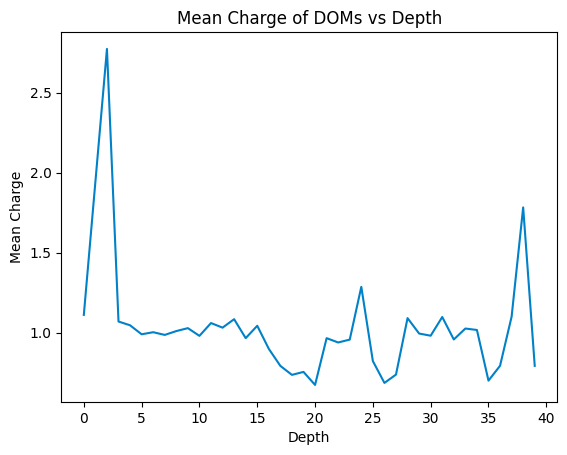

In [11]:
# Make a plot showing the mean charge of the DOMs as a function of the depth of the DOMs.

df_splits['depth'] = df_splits['dom_z']
df_splits['depth'] = pd.cut(df_splits['depth'], bins=40, labels=False)
df_splits.groupby('depth')['charge'].mean().plot()
plt.xlabel('Depth')
plt.ylabel('Mean Charge')
plt.title('Mean Charge of DOMs vs Depth')
plt.show()



Text(0.5, 1.0, 'Mean Charge Observed by DOMs vs Depth')

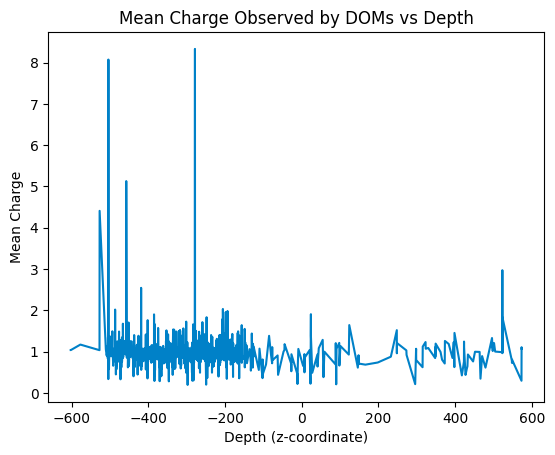

In [12]:
# Make a plot showing the mean charge observed by the DOMs as a function of depth (z-coordinate)

# Calculate the depth of the DOMs
depth = df_splits['dom_z']

# The mean charge observed by the DOMs as a function of depth
charge = df_splits['charge']

# Sum the charge observed by the DOMs at each depth
charge_sum = df_splits.groupby(depth)['charge'].sum()

# Divide by the number of hits observed by each dom at each depth
charge_mean = charge_sum / df_splits.groupby(depth)['charge'].count()

# Plot the mean charge observed by the DOMs as a function of depth
charge_mean.plot()
plt.xlabel('Depth (z-coordinate)')
plt.ylabel('Mean Charge')
plt.title('Mean Charge Observed by DOMs vs Depth')


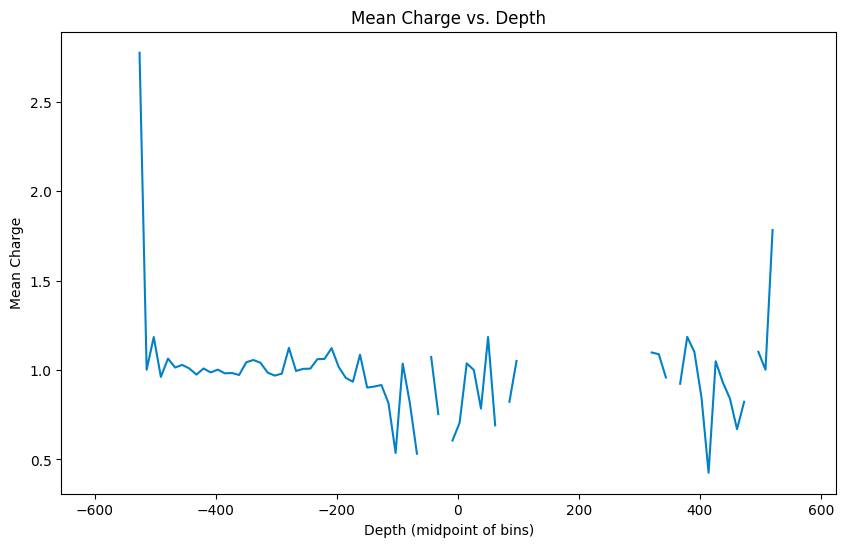

In [13]:
bin_result = pd.cut(df_splits['dom_z'], bins=100, retbins=True, labels=False)
df_splits['depth'] = bin_result[0]  # Binned depth as integer labels
bin_edges = bin_result[1]           # Bin edges as an array


mean_charge = df_splits.groupby('depth')['charge'].mean()


bin_midpoints = 0.5 * (bin_edges[:-1] + bin_edges[1:])  # Calculate midpoints

mean_charge = mean_charge.reindex(range(len(bin_midpoints)), fill_value=np.nan)


plt.figure(figsize=(10, 6))
plt.plot(bin_midpoints, mean_charge)
plt.xlabel('Depth (midpoint of bins)')
plt.ylabel('Mean Charge')
plt.title('Mean Charge vs. Depth')
plt.show()


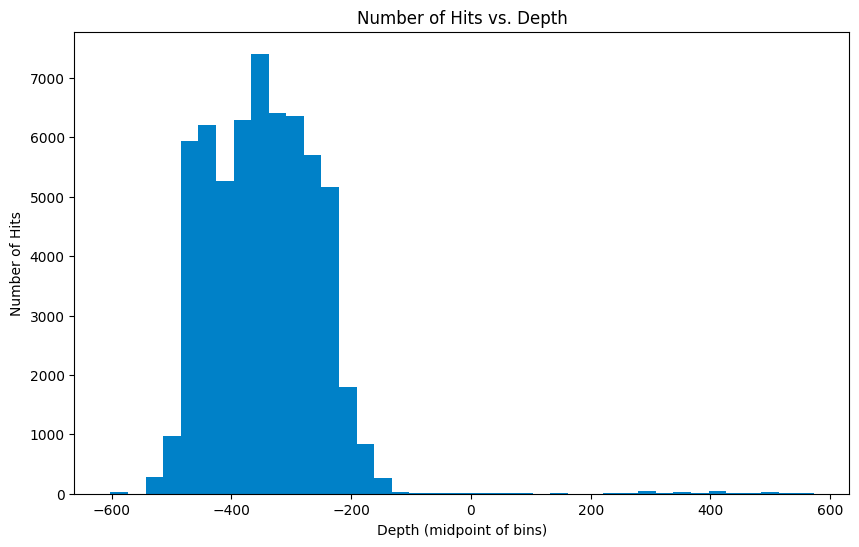

In [28]:
# Make a histogram showing the amount of hits observed by the DOMs as a function of depth (z-coordinate)

# Calculate the depth of the DOMs
depth = df_splits['dom_z']

# The number of hits observed by the DOMs as a function of depth
hits = df_splits['charge']

bin_result = pd.cut(df_splits['dom_z'], bins=40, retbins=True, labels=False)
df_splits['depth'] = bin_result[0]  # Binned depth as integer labels
bin_edges = bin_result[1]           # Bin edges as an array

hits = df_splits.groupby('depth')['charge'].count()

bin_midpoints = 0.5 * (bin_edges[:-1] + bin_edges[1:])  # Calculate midpoints

hits = hits.reindex(range(len(bin_midpoints)), fill_value=0)

# Make a histogram showing the amount of hits observed by the DOMs as a function of depth
plt.figure(figsize=(10, 6))
plt.bar(bin_midpoints, hits, width=np.diff(bin_edges), align='center')
plt.xlabel('Depth (midpoint of bins)')
plt.ylabel('Number of Hits')
plt.title('Number of Hits vs. Depth')
plt.show()


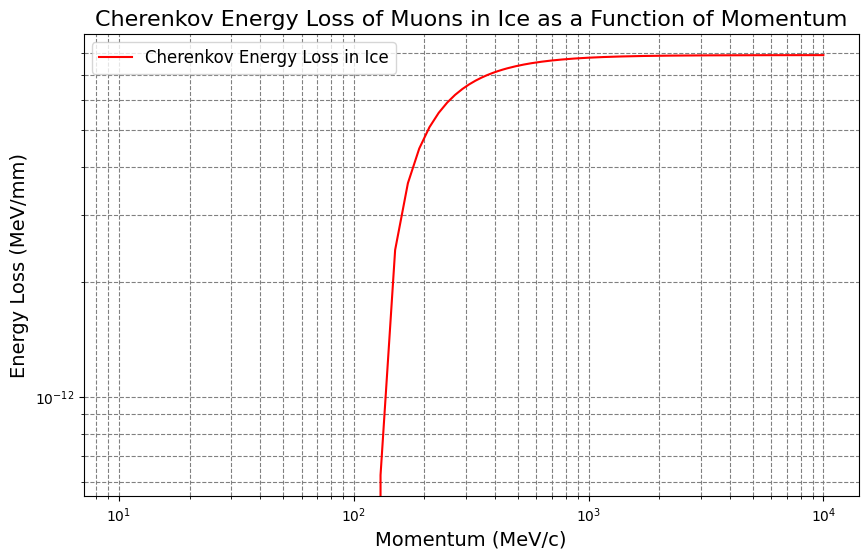

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, pi

# Constants
e = 1.602e-19  # Elementary charge in Coulombs
epsilon_0 = 8.854e-12  # Permittivity of free space in F/m
c = 2.998e8  # Speed of light in vacuum (m/s)
n = 1.31  # Refractive index of ice
muon_mass = 105.66  # Muon mass in MeV/c^2
omega_max = 3e15  # Maximum angular frequency of the Cherenkov radiation (in Hz)

# Convert speed of light to cm/s for consistency in units
c_cm = c * 100  # cm/s

# Define functions for beta, gamma, and energy loss per unit length
def gamma(p):
    return sqrt(1 + (p / muon_mass) ** 2)

def beta(p):
    return sqrt(1 - 1 / gamma(p)**2)

def cherenkov_energy_loss_per_mm(p):
    # Calculate beta
    beta_val = beta(p)
    
    # Check if Cherenkov condition is met (beta > 1/n)
    if beta_val <= 1 / n:
        return 0  # No Cherenkov radiation below this threshold
    
    # Energy loss per mm due to Cherenkov radiation
    energy_loss = (e**2 / (4 * pi * epsilon_0)) * (n * omega_max / c_cm) * (1 - 1 / (beta_val**2 * n**2))
    
    # Convert energy loss to MeV/mm (1 J = 6.242e12 MeV)
    energy_loss_mev = energy_loss * 6.242e12 / 10  # Convert from J/cm to MeV/mm
    return energy_loss_mev

# Momentum range (in MeV/c)
momenta = np.linspace(10, 10000, 500)  # Momentum range from 10 MeV/c to 10,000 MeV/c

# Calculate Cherenkov energy loss for each momentum value
cherenkov_energy_loss_values = np.array([cherenkov_energy_loss_per_mm(p) for p in momenta])

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(momenta, cherenkov_energy_loss_values, label='Cherenkov Energy Loss in Ice', color='red')

plt.xlabel('Momentum (MeV/c)', fontsize=14)
plt.ylabel('Energy Loss (MeV/mm)', fontsize=14)
plt.title('Cherenkov Energy Loss of Muons in Ice as a Function of Momentum', fontsize=16)
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which="both", ls="--", color='gray')
plt.legend(fontsize=12)
plt.show()


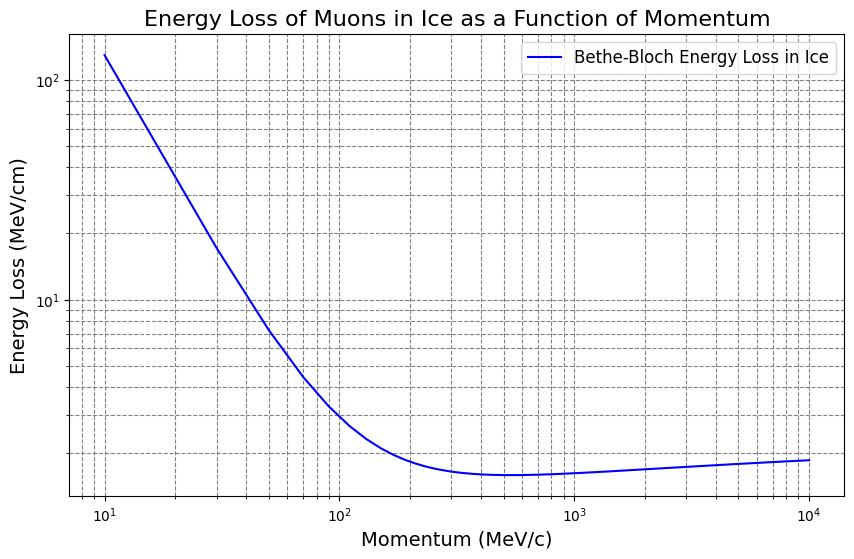

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, log

# Constants
K = 0.307075  # MeV g^-1 cm^2
z = 1  # muon charge
Z = 7.42  # Effective atomic number for ice (H2O)
A = 18.015  # Atomic mass of ice (water) in g/mol
m_mu = 105.66  # MeV/c^2, muon mass
m_e = 0.511  # MeV/c^2, electron mass
rho = 0.917  # g/cm^3, density of ice
I = 0.000078  # MeV (mean excitation potential of ice, 78 eV)

# Define functions for beta, gamma, and T_max
gamma = lambda p: sqrt(1 + (p / m_mu) ** 2)
beta = lambda p: sqrt(1 - 1 / gamma(p) ** 2)
beta_gamma = lambda p: p / m_mu
T_max = lambda p: 2 * m_e * (beta_gamma(p)) ** 2 / (1 + 2 * gamma(p) * m_e / m_mu + (m_e / m_mu) ** 2)

# Calculate plasma frequency
h_omega_p = sqrt(rho * Z / A) * 28.816 / 1e6  # Convert to MeV

# Define the Bethe-Bloch formula for energy loss in ice
def dE_over_dX(p):
    beta_val = beta(p)
    return K * z**2 * (Z / A) / beta_val**2 * (
        0.5 * log(2 * m_e * T_max(p) / h_omega_p**2) - beta_val**2 + 0.5
    )

# Momentum range (in MeV/c)
momenta = np.linspace(10, 10000, 500)  # Momentum range from 10 MeV/c to 10,000 MeV/c

# Calculate energy loss for each momentum value
dE_dx_values = np.array([dE_over_dX(p) for p in momenta])

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(momenta, dE_dx_values, label='Bethe-Bloch Energy Loss in Ice', color='blue')

plt.xlabel('Momentum (MeV/c)', fontsize=14)
plt.ylabel('Energy Loss (MeV/cm)', fontsize=14)
plt.title('Energy Loss of Muons in Ice as a Function of Momentum', fontsize=16)
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which="both", ls="--", color='gray')
plt.legend(fontsize=12)
plt.show()
